In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import time

In [133]:
# path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Latency/combine/'
path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Human/combine/'
# path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Weighted/combine/'

In [134]:
csv_files = glob.glob(path +'/*.csv')
lst = [pd.read_csv(i, index_col=[0]) for i in csv_files]
len(lst)

4

Separating the data into sets-oriented format
- separated_data[0] returs all set 1 data for all participants
- separated_data[1] returns set 2

In [135]:
def name_based_concat(data_lst = lst):
    hold = [[] for i in range(0, len(data_lst))]
    # data_transpose = [[] for i in range(0, len(data_lst))]
    
    step = 10
    for i in range(0, len(data_lst)):
        for j in range(0, len(data_lst[0]), step):
            hold[i].append(data_lst[i][j:j+step])
        # data_transpose[i] = hold[i].transpose()
    return hold
separated_data = name_based_concat()
len(separated_data)

4

In [136]:
num_sets = 3
trans = [ [[] for m in range(0, len(lst))] for n in range(0, num_sets)]
trans[0]

[[], [], [], []]

In [137]:
num_sets = 3
trans = [ [[] for m in range(0, len(lst))] for n in range(0, num_sets)]

for i in range(0,len(lst)):
    for j in range(0, num_sets):
        trans[j][i] = separated_data[i][j].transpose()

        trans[j][i].reset_index(drop = False, inplace = True)
        trans[j][i].rename(columns={'index':'Name'},inplace = True)
        trans[j][i].drop(0, inplace = True)

In [138]:
trans

[[   Name          0         1         2         3         4         5  \
  1    HR  10.356546  4.624215  4.134775  6.081171   5.63742  7.266021   
  2   EDA   0.006408  0.008833  0.011956  0.012741  0.014429  0.015903   
  3  TEMP  -0.218473 -0.241181 -0.285764 -0.386556 -0.512598 -0.554098   
  
            6         7         8         9  
  1  1.603493  3.328064  1.251236  4.925212  
  2   0.01845  0.020052  0.021921  0.024217  
  3 -0.628931 -0.759931 -0.953681 -1.176556  ,
     Name         0          1          2          3          4         5  \
  1    HR  12.79354  12.545337  11.412639  12.514684  17.213277  8.821935   
  2   EDA -0.033535   0.210239   0.216844   0.708339   0.264716   0.30837   
  3  TEMP -0.215131  -0.263381  -0.199548  -0.288798  -0.359131 -0.280048   
  
            6         7         8          9  
  1  7.655297  9.066976  5.351026  10.923774  
  2  0.338609   0.89313  2.022629    2.23618  
  3 -0.312214 -0.380048 -0.445048  -0.529506  ,
     Name       

In [139]:
# trans[0] = set 1, trans[1] = set 2, trans[2] = set 3
set_1_data = pd.concat(trans[0])
set_2_data = pd.concat(trans[1])
set_3_data = pd.concat(trans[2])

set_1_data

,Name,0,1,2,3,4,5,6,7,8,9
1,HR,10.356546,4.624215,4.134775,6.081171,5.63742,7.266021,1.603493,3.328064,1.251236,4.925212
2,EDA,0.006408,0.008833,0.011956,0.012741,0.014429,0.015903,0.01845,0.020052,0.021921,0.024217
3,TEMP,-0.218473,-0.241181,-0.285764,-0.386556,-0.512598,-0.554098,-0.628931,-0.759931,-0.953681,-1.176556
1,HR,12.79354,12.545337,11.412639,12.514684,17.213277,8.821935,7.655297,9.066976,5.351026,10.923774
2,EDA,-0.033535,0.210239,0.216844,0.708339,0.264716,0.30837,0.338609,0.89313,2.022629,2.23618
3,TEMP,-0.215131,-0.263381,-0.199548,-0.288798,-0.359131,-0.280048,-0.312214,-0.380048,-0.445048,-0.529506
1,HR,7.557778,13.838538,5.977656,4.094074,3.603143,5.281777,5.152873,3.452907,6.6683,6.976886
2,EDA,0.009793,0.35816,0.423045,0.308267,0.271477,0.27041,0.291992,0.310974,0.361507,0.414165
3,TEMP,-0.009628,-0.03942,-0.073962,-0.230878,-0.382962,-0.492753,-0.572795,-0.602295,-0.586878,-0.697378
1,HR,1.745125,3.476388,1.522903,-0.279091,-0.875849,4.220753,6.482082,3.694533,3.307154,4.372256


In [140]:
def find_idx(data):
    ls =[]
    for i in range(0,len(data)):
        if data[i]:
            ls.append(i)
    return ls

tst_name = pd.Index(set_1_data['Name']).get_loc('HR')
idx  = find_idx(tst_name)
set_1_data.iloc[idx]

,Name,0,1,2,3,4,5,6,7,8,9
1,HR,10.356546,4.624215,4.134775,6.081171,5.63742,7.266021,1.603493,3.328064,1.251236,4.925212
1,HR,12.79354,12.545337,11.412639,12.514684,17.213277,8.821935,7.655297,9.066976,5.351026,10.923774
1,HR,7.557778,13.838538,5.977656,4.094074,3.603143,5.281777,5.152873,3.452907,6.6683,6.976886
1,HR,1.745125,3.476388,1.522903,-0.279091,-0.875849,4.220753,6.482082,3.694533,3.307154,4.372256


In [141]:
def set_loc(test_name):
    sets_data = [set_1_data, set_2_data, set_3_data]
    tst_name = [[] for i in range(0,num_sets)]
    idx = [[] for i in range(0, num_sets)]
    name_frame = [[] for i in range(0, num_sets)]

    # get the set 1, set 2, set 3 data for the chosen 'test name', which are HR, EDA, TEMP
    for i in range(0, num_sets):
        tst_name[i] = pd.Index(sets_data[i]['Name']).get_loc(test_name)
        idx[i] = find_idx(tst_name[i])
        name_frame[i] = sets_data[i].iloc[idx[i]]
    return name_frame


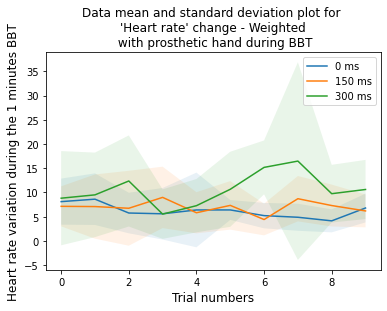

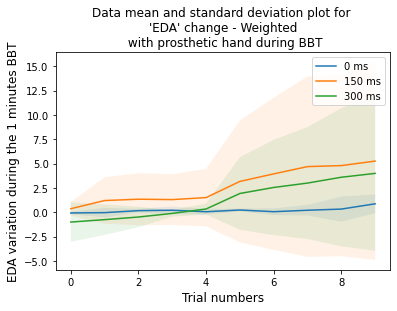

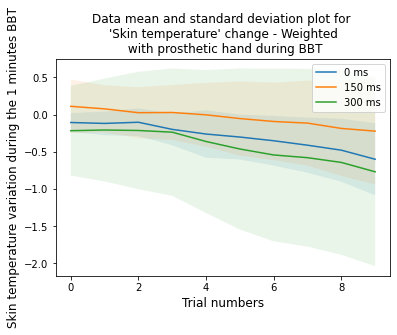

In [142]:

hr = set_loc('HR')
eda = set_loc('EDA')
temp = set_loc('TEMP')

# set_1_mean
# .iloc[:,1:] used to eliminate the string column, e.g. 'HR'
def sets_mean(data, name, test, hand):
    s1_mean  = data[0].iloc[:,1:].mean(axis = 0)
    s2_mean  = data[1].iloc[:,1:].mean(axis = 0)
    s3_mean  = data[2].iloc[:,1:].mean(axis = 0)

    s1_std = data[0].iloc[:,1:].std()
    s2_std = data[1].iloc[:,1:].std()
    s3_std = data[2].iloc[:,1:].std()

    plt.plot(range(0,len(s1_mean)),s1_mean, label = '0 ms')
    # plt.plot(range(0,len(s1_mean)),s1_mean, label = '0    KG')

    plt.fill_between(range(0,len(s1_mean)),s1_mean+s1_std,s1_mean-s1_std, alpha = 0.1)
    
    plt.plot(range(0,len(s2_mean)),s2_mean,label = '150 ms')
    # plt.plot(range(0,len(s2_mean)),s2_mean,label = '0.5 KG')

    plt.fill_between(range(0,len(s2_mean)),s2_mean+s2_std,s2_mean-s2_std, alpha = 0.1)


    plt.plot(range(0,len(s3_mean)),s3_mean,label = '300 ms')
    # plt.plot(range(0,len(s3_mean)),s3_mean,label = '1    KG')

    plt.fill_between(range(0,len(s3_mean)),s3_mean+s3_std,s3_mean-s3_std, alpha = 0.1)

    plt.legend()
    plt.title('Data mean and standard deviation plot for ' +'\n'+"'"
        +name+"'" +' change - '+test +'\n'+' with '+hand+' hand during BBT')
    plt.xlabel('Trial numbers', fontsize = 12)
    plt.ylabel(name+' variation during the 1 minutes BBT', fontsize = 12)
    plt.savefig(path+name+' line graph for' + test +' '+ hand+' hand'+'.jpg', dpi = 300, bbox_inches='tight')
    plt.show()

sets_mean(hr, name = 'Heart rate', test = 'Weighted', hand = 'prosthetic')
sets_mean(eda, name = 'EDA', test = 'Weighted', hand = 'prosthetic')
sets_mean(temp, name = 'Skin temperature', test = 'Weighted', hand = 'prosthetic')
